# Exploring the Training Data

In [2]:
import pandas as pd

In [3]:
df_train = pd.read_json('C:/Users/ArunM/Desktop/MSBAPM/DataMining & BI/Project/Data/train.json/train.json')
df_train.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


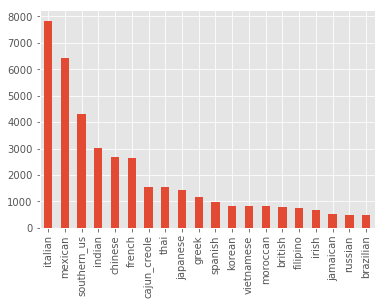

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
df_train['cuisine'].value_counts().plot(kind='bar')

In [5]:
from collections import Counter
counters = {}
for cuisine in df_train['cuisine'].unique():
    counters[cuisine] = Counter()
    indices = (df_train['cuisine'] == cuisine)
    for ingredients in df_train[indices]['ingredients']:
        counters[cuisine].update(ingredients)
        

In [6]:

top10 = pd.DataFrame([[items[0] for items in counters[cuisine].most_common(10)] for cuisine in counters],
            index=[cuisine for cuisine in counters],
            columns=['top{}'.format(i) for i in range(1, 11)])
top10

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10
greek,salt,olive oil,dried oregano,garlic cloves,feta cheese crumbles,extra-virgin olive oil,fresh lemon juice,ground black pepper,garlic,pepper
southern_us,salt,butter,all-purpose flour,sugar,large eggs,baking powder,water,unsalted butter,milk,buttermilk
filipino,salt,garlic,water,onions,soy sauce,pepper,oil,sugar,carrots,ground black pepper
indian,salt,onions,garam masala,water,ground turmeric,garlic,cumin seed,ground cumin,vegetable oil,oil
jamaican,salt,onions,water,garlic,ground allspice,pepper,scallions,dried thyme,black pepper,garlic cloves
spanish,salt,olive oil,garlic cloves,extra-virgin olive oil,onions,water,tomatoes,ground black pepper,red bell pepper,pepper
italian,salt,olive oil,garlic cloves,grated parmesan cheese,garlic,ground black pepper,extra-virgin olive oil,onions,water,butter
mexican,salt,onions,ground cumin,garlic,olive oil,chili powder,jalapeno chilies,sour cream,avocado,corn tortillas
chinese,soy sauce,sesame oil,salt,corn starch,sugar,garlic,water,green onions,vegetable oil,scallions
british,salt,all-purpose flour,butter,milk,eggs,unsalted butter,sugar,onions,baking powder,large eggs


In [7]:
df_train['all_ingredients'] = df_train['ingredients'].map(";".join)
df_train.head()

,cuisine,id,ingredients,all_ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...",romaine lettuce;black olives;grape tomatoes;ga...
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...",plain flour;ground pepper;salt;tomatoes;ground...
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...",eggs;pepper;salt;mayonaise;cooking oil;green c...
3,indian,22213,"[water, vegetable oil, wheat, salt]",water;vegetable oil;wheat;salt
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...",black pepper;shallots;cornflour;cayenne pepper...


In [8]:
import numpy as np
unique = np.unique(top10.values.ravel())
unique

array(['all-purpose flour', 'avocado', 'baking powder', 'baking soda',
       'black pepper', 'butter', 'buttermilk', 'cachaca',
       'cajun seasoning', 'carrots', 'cayenne pepper', 'chili powder',
       'coconut milk', 'corn starch', 'corn tortillas', 'cumin seed',
       'dried oregano', 'dried thyme', 'eggs', 'extra-virgin olive oil',
       'feta cheese crumbles', 'fish sauce', 'fresh lemon juice',
       'fresh lime juice', 'garam masala', 'garlic', 'garlic cloves',
       'ginger', 'grated parmesan cheese', 'green bell pepper',
       'green onions', 'ground allspice', 'ground black pepper',
       'ground cinnamon', 'ground cumin', 'ground ginger',
       'ground turmeric', 'jalapeno chilies', 'large eggs', 'lime', 'milk',
       'mirin', 'oil', 'olive oil', 'onions', 'paprika', 'pepper',
       'potatoes', 'red bell pepper', 'rice vinegar', 'sake', 'salt',
       'scallions', 'sesame oil', 'sesame seeds', 'shallots', 'sour cream',
       'soy sauce', 'sugar', 'tomatoes', 'un

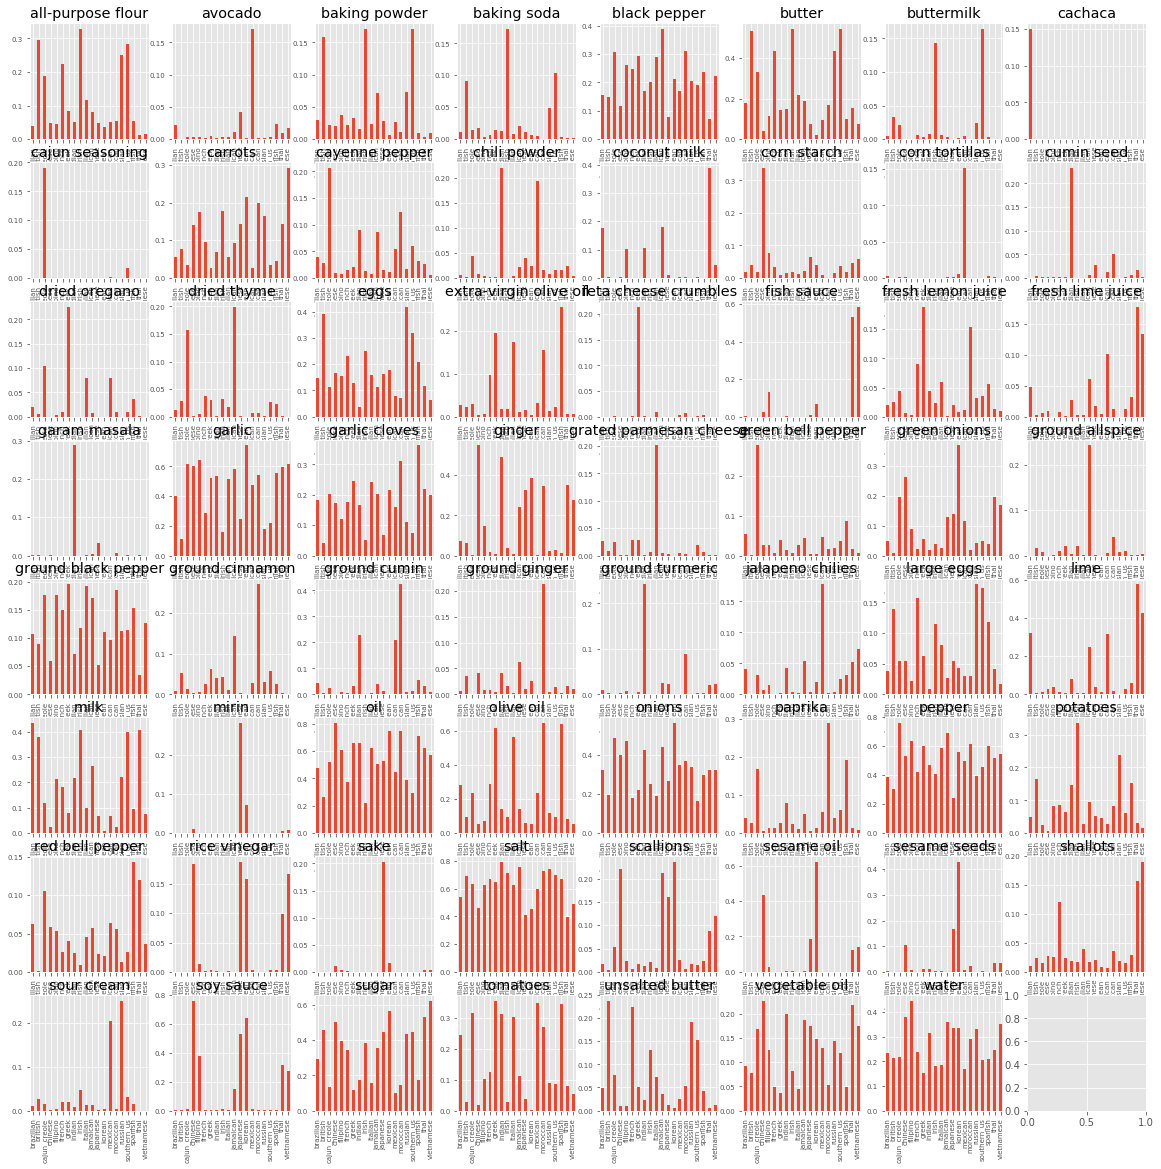

In [9]:
fig, axes = plt.subplots(8, 8, figsize=(20, 20))
for ingredient, ax_index in zip(unique, range(64)):
    indices = df_train['all_ingredients'].str.contains(ingredient)
    relative_freq = (df_train[indices]['cuisine'].value_counts() / df_train['cuisine'].value_counts())
    relative_freq.plot(kind='bar', ax=axes.ravel()[ax_index], fontsize=7, title=ingredient)

# Building a logistic regression classifier using Training set

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(df_train['all_ingredients'].values)


In [11]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
y = enc.fit_transform(df_train.cuisine)


In [13]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
Training

In [14]:

from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
logistic.score(X_test, y_test)

0.78730358265241984

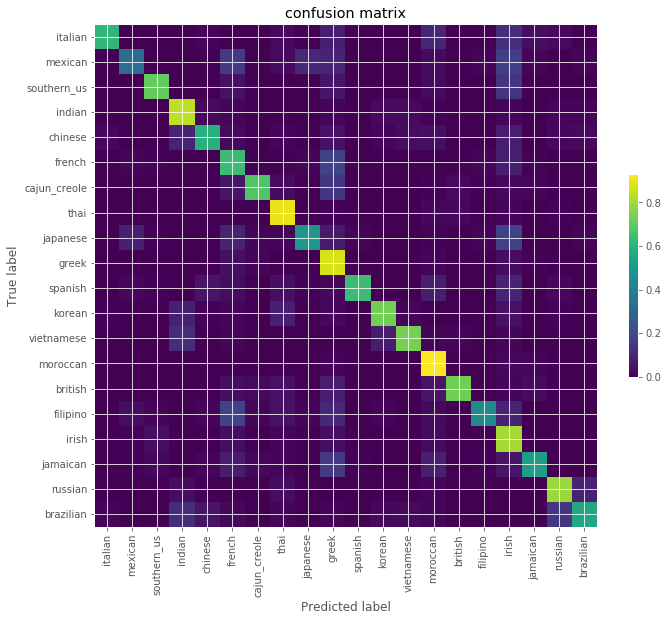

In [16]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(10, 10))

cm = confusion_matrix(y_test, logistic.predict(X_test))
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.imshow(cm_normalized, interpolation='nearest')
plt.title("confusion matrix")
plt.colorbar(shrink=0.3)
cuisines = df_train['cuisine'].value_counts().index
tick_marks = np.arange(len(cuisines))
plt.xticks(tick_marks, cuisines, rotation=90)
plt.yticks(tick_marks, cuisines)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
Building a logistic random forest classifier using Training set

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(df_train['all_ingredients'].values)
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
y = enc.fit_transform(df_train.cuisine)
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
rf_classifier.score(X_test, y_test)

0.70810810810810809

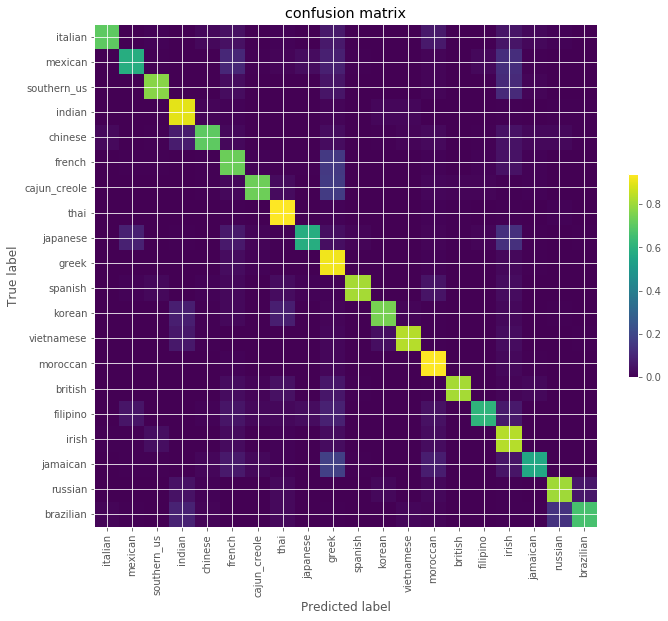

In [18]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(10, 10))

cm = confusion_matrix(y_test, logistic.predict(X_test))
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.imshow(cm_normalized, interpolation='nearest')
plt.title("confusion matrix")
plt.colorbar(shrink=0.3)
cuisines = df_train['cuisine'].value_counts().index
tick_marks = np.arange(len(cuisines))
plt.xticks(tick_marks, cuisines, rotation=90)
plt.yticks(tick_marks, cuisines)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
Building a Decision Tree classifier using Training set

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(df_train['all_ingredients'].values)
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
y = enc.fit_transform(df_train.cuisine)
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
dt_classifier.score(X_test, y_test)


0.63959773727215585

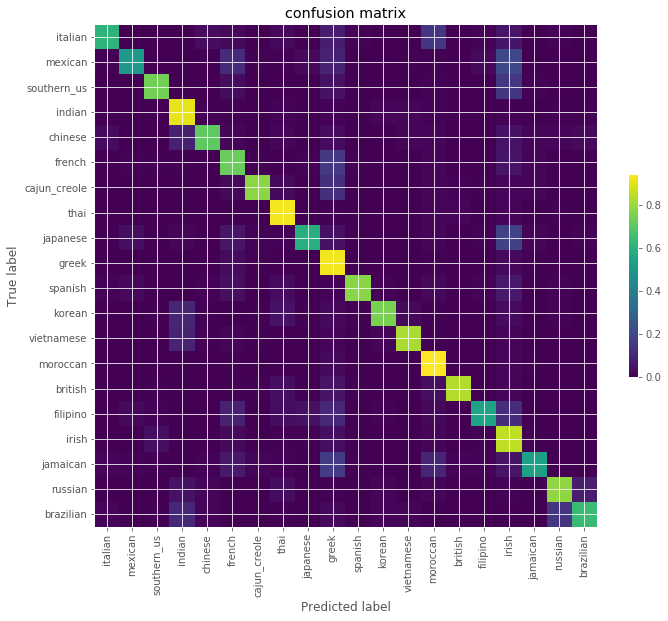

In [21]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(10, 10))

cm = confusion_matrix(y_test, logistic.predict(X_test))
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.imshow(cm_normalized, interpolation='nearest')
plt.title("confusion matrix")
plt.colorbar(shrink=0.3)
cuisines = df_train['cuisine'].value_counts().index
tick_marks = np.arange(len(cuisines))
plt.xticks(tick_marks, cuisines, rotation=90)
plt.yticks(tick_marks, cuisines)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
As per the result of missclassification rate, The logistic regression classifier is the best model.

Predicting on test data using  logistic regression Classifier.

In [26]:
import json
from pandas import DataFrame
from collections import OrderedDict
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

with open('C:/Users/ArunM/Desktop/MSBAPM/DataMining & BI/Project/Data/train.json/train.json') as train_f, open('C:/Users/ArunM/Desktop/MSBAPM/DataMining & BI/Project/Data/test.json/test.json') as test_f:
    train_data = json.load(train_f)
    test_data = json.load(test_f)

train_X = [' '.join(e['ingredients']) for e in train_data]
train_Y = [e['cuisine'] for e in train_data]
test_X = [' '.join(e['ingredients']) for e in test_data]
test_id = [e['id'] for e in test_data]

enc = LabelEncoder()
cv = CountVectorizer()
train_Y = enc.fit_transform(train_Y)
train_X = cv.fit_transform(train_X).toarray()
test_X = cv.transform(test_X).toarray()

logistic = LogisticRegression()
logistic.fit(train_X, train_Y)

test_Y = logistic.predict(test_X)
test_Y = enc.inverse_transform(test_Y)

d = DataFrame(data=OrderedDict([('id', test_id), ('cuisine', test_Y)]))
d.to_csv('C:/Users/ArunM/Desktop/MSBAPM/DataMining & BI/Project/Data/prediction_logistic.csv', index=False)

In [ ]:
Predicting on test data using  random forest classifier. 

In [27]:
import json
from pandas import DataFrame
from collections import OrderedDict
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer


with open('C:/Users/ArunM/Desktop/MSBAPM/DataMining & BI/Project/Data/train.json/train.json') as train_f, open('C:/Users/ArunM/Desktop/MSBAPM/DataMining & BI/Project/Data/test.json/test.json') as test_f:
    train_data = json.load(train_f)
    test_data = json.load(test_f)

train_X = [' '.join(e['ingredients']) for e in train_data]
train_Y = [e['cuisine'] for e in train_data]
test_X = [' '.join(e['ingredients']) for e in test_data]
test_id = [e['id'] for e in test_data]

enc = LabelEncoder()
cv = CountVectorizer()
train_Y = enc.fit_transform(train_Y)
train_X = cv.fit_transform(train_X).toarray()
test_X = cv.transform(test_X).toarray()

rf_classifier = RandomForestClassifier()
rf_classifier.fit(train_X, train_Y)

test_Y = rf_classifier.predict(test_X)
test_Y = enc.inverse_transform(test_Y)

d = DataFrame(data=OrderedDict([('id', test_id), ('cuisine', test_Y)]))
d.to_csv('C:/Users/ArunM/Desktop/MSBAPM/DataMining & BI/Project/Data/prediction_randomforest.csv', index=False)

In [28]:

import json
from pandas import DataFrame
from collections import OrderedDict
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer


with open('C:/Users/ArunM/Desktop/MSBAPM/DataMining & BI/Project/Data/train.json/train.json') as train_f, open('C:/Users/ArunM/Desktop/MSBAPM/DataMining & BI/Project/Data/test.json/test.json') as test_f:
    train_data = json.load(train_f)
    test_data = json.load(test_f)

train_X = [' '.join(e['ingredients']) for e in train_data]
train_Y = [e['cuisine'] for e in train_data]
test_X = [' '.join(e['ingredients']) for e in test_data]
test_id = [e['id'] for e in test_data]

enc= LabelEncoder()
cv = CountVectorizer()
train_Y = enc.fit_transform(train_Y)
train_X = cv.fit_transform(train_X).toarray()
test_X = cv.transform(test_X).toarray()

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(train_X, train_Y)

test_Y = dt_classifier.predict(test_X)
test_Y = enc.inverse_transform(test_Y)

d = DataFrame(data=OrderedDict([('id', test_id), ('cuisine', test_Y)]))
d.to_csv('C:/Users/ArunM/Desktop/MSBAPM/DataMining & BI/Project/Data/prediction_decision.csv', index=False)